<a href="https://colab.research.google.com/github/gkr0828/gkr0828/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

자동 미분

In [ ]:
# y = x^2의 미분값 구하기
x = tf.Variable(2.0)

with tf.GradientTape() as tape:
    y=x ** 2
dy_dx = tape.gradient(y,x)
dy_dx.numpy()

4.0

In [ ]:
##reduced_mean()
m2 = tf.constant([[1.,1.],[2.,2.]])
m2

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [2., 2.]], dtype=float32)>

데이터셋 생성


In [ ]:
g = tf.random.Generator.from_seed(2020)
x = g.normal(shape=(10,))
y = 3 * x - 2

In [ ]:
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.20943771,  1.2746525 ,  1.213214  , -0.17576952,  1.876984  ,
        0.16379918,  1.082245  ,  0.6199966 , -0.44402212,  1.3048344 ],
      dtype=float32)>

In [ ]:
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-2.628313  ,  1.8239574 ,  1.6396422 , -2.5273085 ,  3.630952  ,
       -1.5086024 ,  1.2467351 , -0.14001012, -3.3320663 ,  1.9145031 ],
      dtype=float32)>

In [ ]:
##loss함수 정의
def cal_mse(x,y,a,b):
    y_prde = a * x + b
    squared_error = (y_prde - y) ** 2
    mean_squared_error = tf.reduce_mean(squared_error)

    return mean_squared_error

In [ ]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)

EPOCHS = 1000

for epoch in range(1, EPOCHS+1):
    with tf.GradientTape() as tape:
      mse = cal_mse(x,y,a,b)
    if mse < 0.0000001:
      break
    grade = tape.gradient(mse, {'a':a, 'b':b})
    d_a, d_b = grade['a'],grade['b']
    a.assign_sub(d_a * 0.05) ## a = a - d_a * 0.05(학습률)
    b.assign_sub(d_b * 0.05) ## b = b - d_b * 0.05(학습률)

    if epoch % 20 == 0:
      print("EPOCH %d - MSE : %.4f - a: %.2f - b : %2.2f"%(epoch, mse, a,b))


EPOCH 20 - MSE : 1.1415 - a: 1.74 - b : -0.75
EPOCH 40 - MSE : 0.2881 - a: 2.37 - b : -1.37
EPOCH 60 - MSE : 0.0728 - a: 2.69 - b : -1.68
EPOCH 80 - MSE : 0.0184 - a: 2.84 - b : -1.84
EPOCH 100 - MSE : 0.0046 - a: 2.92 - b : -1.92
EPOCH 120 - MSE : 0.0012 - a: 2.96 - b : -1.96
EPOCH 140 - MSE : 0.0003 - a: 2.98 - b : -1.98
EPOCH 160 - MSE : 0.0001 - a: 2.99 - b : -1.99
EPOCH 180 - MSE : 0.0000 - a: 2.99 - b : -1.99
EPOCH 200 - MSE : 0.0000 - a: 3.00 - b : -2.00
EPOCH 220 - MSE : 0.0000 - a: 3.00 - b : -2.00
EPOCH 240 - MSE : 0.0000 - a: 3.00 - b : -2.00


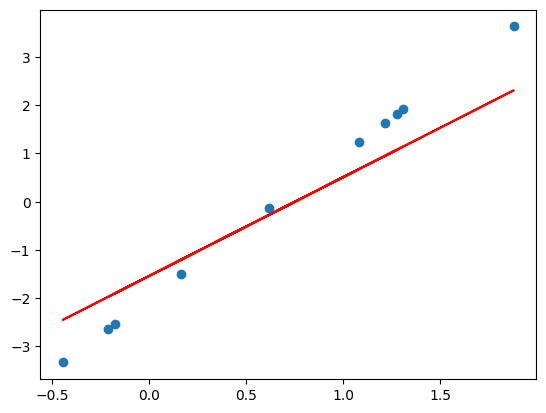

In [17]:
y_pred = 2.05 * x -1.54
plt.scatter(x,y)
plt.plot(x,y_pred,color = 'r')
plt.show()

노이즈 첨가

In [18]:
g = tf.random.Generator.from_seed(2020)
x1 = g.normal(shape=(10,))
noise = np.random.normal(0,1,size = (10,))
y= 3*x-2+noise

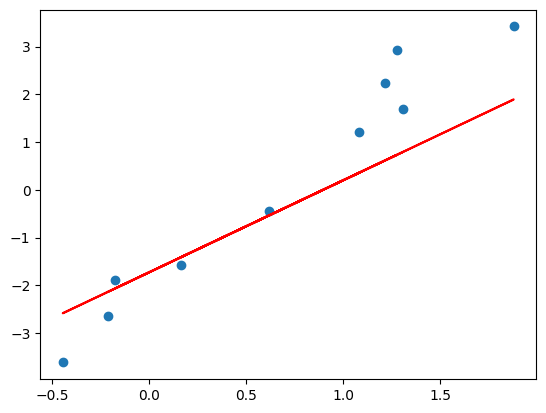

In [19]:
y_pred = 1.93 * x1 -1.73
plt.scatter(x1,y)
plt.plot(x1,y_pred,color = 'r')
plt.show()